## KNN for Diabetes Clasification using Pima Indians Diabetes Dataset

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. **Preparing and loading the data**

In [90]:
#1. Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [91]:
#2. Get column names
df_name=diabetes_data.columns

In [92]:
#3. Count zero values
print("Count of zero values") 
colsToModify = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',]
val = []
for col in colsToModify:
  val.append(len(diabetes_data[diabetes_data[col] == 0]))
zeroCount = pd.DataFrame(val, index = colsToModify, columns = ['zeroValues'])
zeroCount

Count of zero values


,zeroValues
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [93]:
#4. Replace zero values with mean values
for col in colsToModify:
    diabetes_data[col] = diabetes_data[col].replace(0,np.NaN)
    mean = int(diabetes_data[col].mean(skipna = True))
    diabetes_data[col] = diabetes_data[col].replace(np.NaN, mean)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [94]:
#5. Display duplicated values (after replacing zero values)
diabetes_data.duplicated().sum()

0

2. **Data Visualization**

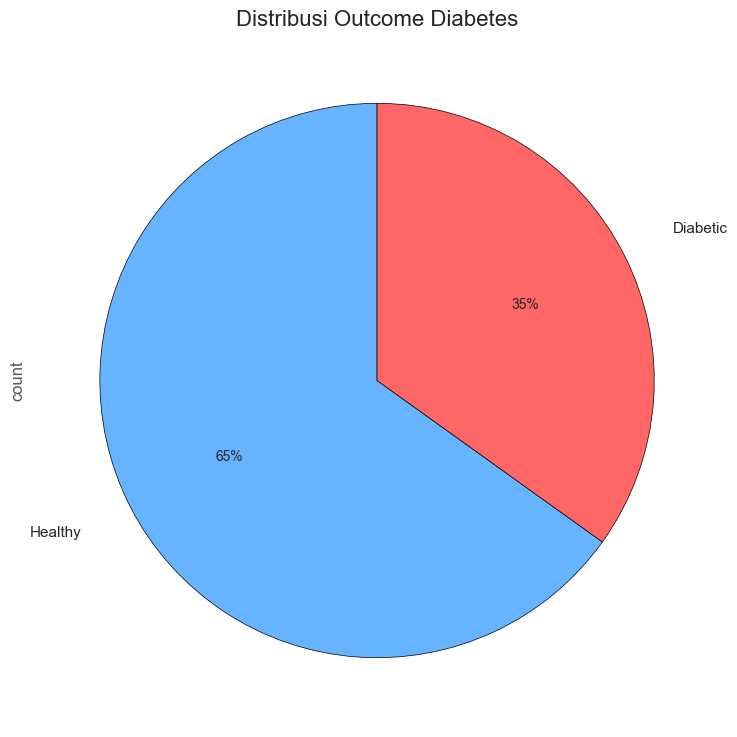

In [95]:
#1. Import library untuk plotting 
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('ggplot')
labels = ["Healthy", "Diabetic"]
# Membuat pie chart dengan warna yang lebih mencolok dan penyesuaian lain
colors = ['#66b3ff', '#ff6666']  # Warna biru untuk Healthy, merah untuk Diabetic
diabetes_data['Outcome'].value_counts().plot(kind='pie', labels=labels, 
                                              autopct='%1.0f%%', labeldistance=1.2, 
                                              figsize=(9, 9), colors=colors, 
                                              startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Outcome Diabetes', fontsize=16)
plt.show()


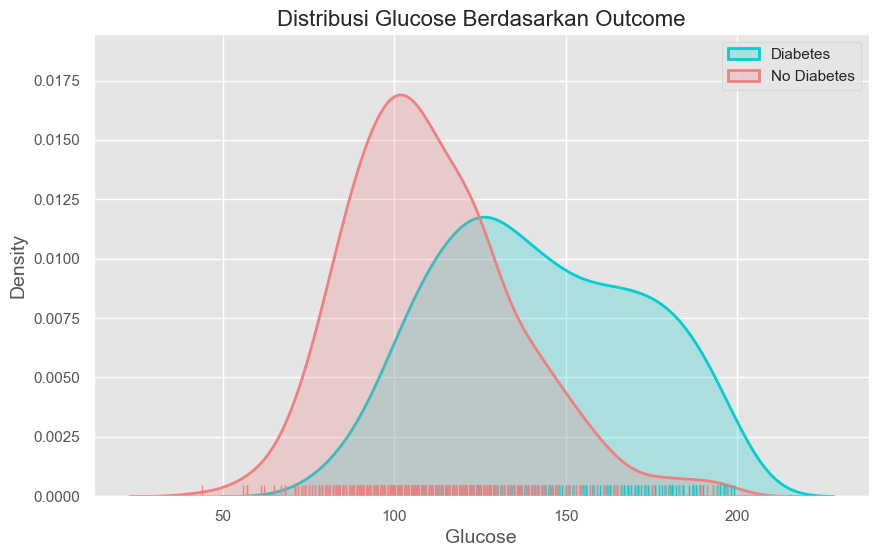

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Distribusi Glucose untuk kelompok Diabetes (Outcome == 1) dengan KDE dan rug plot
sns.kdeplot(diabetes_data['Glucose'][diabetes_data.Outcome == 1], color="darkturquoise", label='Diabetes', shade=True, linewidth=2)
sns.rugplot(diabetes_data['Glucose'][diabetes_data.Outcome == 1], color="darkturquoise")

# Distribusi Glucose untuk kelompok No Diabetes (Outcome == 0) dengan KDE dan rug plot
sns.kdeplot(diabetes_data['Glucose'][diabetes_data.Outcome == 0], color="lightcoral", label='No Diabetes', shade=True, linewidth=2)
sns.rugplot(diabetes_data['Glucose'][diabetes_data.Outcome == 0], color="lightcoral")

plt.legend()
plt.title('Distribusi Glucose Berdasarkan Outcome', fontsize=16)
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


**3. Outlier Detection** 

#Cari nilai2 yg jauh berbeda daro data yg ada biar gada problem pas ukur

1. **Data Splitting**

In [97]:
#1. Import library train_test_split dari sklearn (Data Splitting)
from sklearn.model_selection import train_test_split
X =diabetes_data.iloc[:,0:8] #col 0-7
y =diabetes_data.iloc[:,8] #col 8
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21, stratify = y) # xtrain, ytrain = model training, 
#xtest, ytest = model testing

#testsize = 20% data masuk ke test set, 80% data masuk ke train set
#random_state = 21, agar hasil split tetap sama tiap dijalankan
#stratify = y, agar proporsi kelas dalam set tetap sama jdi kyk bagi data berdasarkan kelas label, (0 dan 1 di target y) agar seimbang intiny

In [98]:
#2. feature Scaling (Standardization)
#standarisasi data, agar data memiliki rata-rata 0 dan standar deviasi 1
#agar model tidak terpengaruh oleh unit yang berbeda
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [99]:
#3. 	Import library KNeighborsClassifier dari sklearn 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23, p=2, metric='euclidean')

#inisialisasi model knn dari scikit-learn dgn parameter terentu n = 23, p = 2 minkowski distance dengan p = 2
#p = 2 maksudnya p = 2, maka akan menggunakan euclidean distance
#p = 1 maksudnya p = 1, maka akan menggunakan manhattan distance
#p = infinity maksudnya p = infinity, maka akan menggunakan chebyshev distance


In [100]:
#4. Melatih model KNN dengan data training 
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [101]:
#5. Memprediksi data uji dengan model KNN 
y_pred =  classifier.predict(X_test)
y_pred

# 0 = pasien gk diabetes, 1 = pasien diabetes
# kan hasilny gk smuanya 0,jd modelnya gk bias full ke 1 kelas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [102]:
#6.Import confusion_matrix dari sklearn untuk evaluasi  
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

#y_test = data uji, y_pred = hasil prediksi model
# prediksi tidak diabetes = 0, prediksi diabetes = 1
        
                        #prediksi: 0 (neg)  #prediksi: 1 (positive)
# asli: 0 (negative) = 90 (true negative), 10 (false positive)
# asli: 1 (positif) = 32 (false negative), 50 (true positive)
# here we can see if the model is good or not, the label 0 is more better than label 1
# label 0 = non diabetes, label 1 = diabetes


array([[90, 10],
       [32, 22]], dtype=int64)

In [103]:
#7. Import accuracy_score dari sklearn untuk evaluasi 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7272727272727273


In [104]:
#8. gridsearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 30)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_gscv.fit(X_train, y_train)

# Best parameter
print("Best n_neighbors:", knn_gscv.best_params_)

# Use the best model
best_knn = knn_gscv.best_estimator_

# Predict
y_pred = best_knn.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# precision: ukur seberapa akurat model ketika classification contoh sebagai kelas tertentu kyk label 0 non diabetes sm 1 diabetes
# recall: ukut seberapa baik model dlm mendeteksi kelas atau label tertentu
# f1 score: harmoni rata2 antara precision n recall, buat gambaran keseimbangan both
# support: jumlah instance nyara dari setiap kelas dalam data uji, menunjukan berapa bnyk data yg sebenarnya ada di dlm kelas terentu 

# jd intiny tuh hasilny model lebih baik dalam klasifikasi class 0 (atau non diabetes) ya karena lebih bnyk org yg gk diabetes drpd yang diabetes sekitar 72% buat akurasi keseluruhan

# model kesulitan dalam mendeteksi class 1 (diabetes) jd model lebih sering salah buat classification class 1

Best n_neighbors: {'n_neighbors': 19}
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       100
           1       0.68      0.39      0.49        54

    accuracy                           0.72       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.72      0.70       154



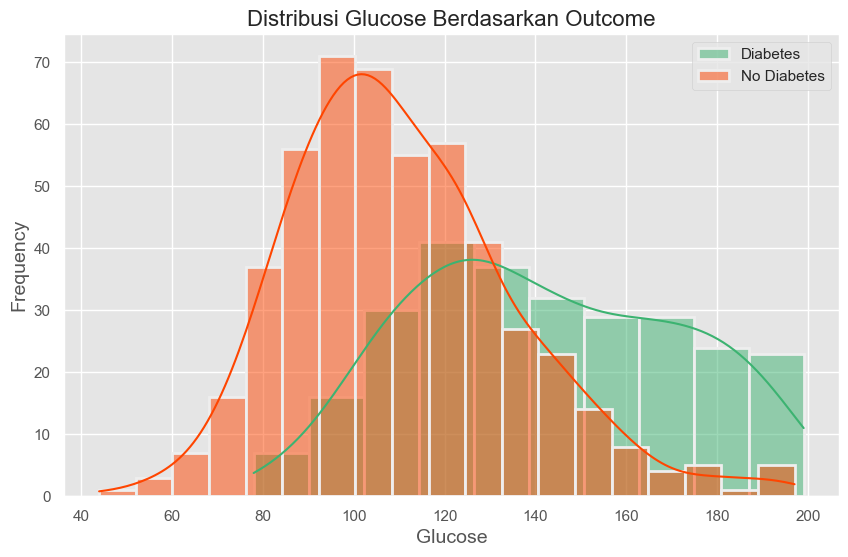

In [105]:
#9. Visualisasi distribusi Glucose untuk kedua kelompok
plt.figure(figsize=(10, 6))

# Distribusi Glucose untuk kelompok diabetes (Outcome == 1)
sns.histplot(diabetes_data['Glucose'][diabetes_data['Outcome'] == 1], color="mediumseagreen", label='Diabetes', kde=True, linewidth=2)

# Distribusi Glucose untuk kelompok tidak diabetes (Outcome == 0)
sns.histplot(diabetes_data['Glucose'][diabetes_data['Outcome'] == 0], color="orangered", label='No Diabetes', kde=True, linewidth=2)
plt.legend()
plt.title('Distribusi Glucose Berdasarkan Outcome', fontsize=16)
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [106]:
#10. save model using joblib
from joblib import dump
import sklearn
print(sklearn.__version__)


# Save trained model using joblib
dump(classifier, 'knn_diabetes_model.joblib')


1.3.0


['knn_diabetes_model.joblib']

In [107]:
#11. cross validation, mengumpulkan akurasi model untuk beberapa nilai K
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracy_rate = []

# Replace 'X_train' with the variable that holds feature data
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=8)  # Ensure X_train is defined
    accuracy_rate.append(score.mean())


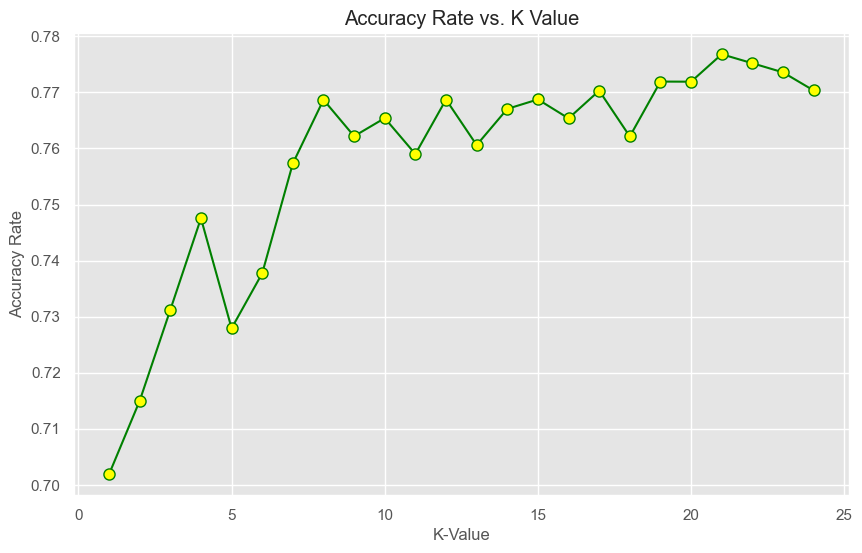

In [108]:
#12. To plot accuracy against that k
plt.figure(figsize=(10,6))

plt.plot(range(1, 25), accuracy_rate, color='green', linestyle='-', marker='o', markerfacecolor='yellow', markersize=8)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Rate')
plt.show()
